## Library 설치(* 명령프롬프트 창에서 실행)
- pip install pandas --upgrade
- pip install numpy --upgrade
- pip install plotly --upgrade
- pip install seaborn --upgrade
- pip install matplotlib --upgrade

## 1. Import Library 및 데이터 원본 폴더 설정

In [148]:
# 라이브러리 가져오기
import numpy as np
import pandas as pd
import plotly
import plotly.io as pio
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [149]:
# 데이터 원본 폴더 경로 설정
# 개인 PC에 저장된 데이터 원본(csv) 경로로 변경해야 합니다. 
file_folder = 'C:/Users/mws88/OneDrive/바탕 화면/멋쟁이사자처럼/강의자료/Chapter7. Python 및 Library 설치 및 캐글 데이터셋 저장/데이터 원본(csv)'
file_folder

'C:/Users/mws88/OneDrive/바탕 화면/멋쟁이사자처럼/강의자료/Chapter7. Python 및 Library 설치 및 캐글 데이터셋 저장/데이터 원본(csv)'

## 2. 데이터 가져오기 및 테이블 결합

In [150]:
# f""{변수}: 문자열 안에 변수 삽입
name = "모원서"
age = 37
print(f"내 이름은 {name}이고, 나이는 {age}살입니다.")

내 이름은 모원서이고, 나이는 37살입니다.


In [151]:
# merge: 데이터 결합
df1 = pd.DataFrame({"ID": [1, 2, 3], "Name": ["Alice", "Bob", "Charlie"]})
df2 = pd.DataFrame({"ID": [1, 2, 4], "Score": [90, 85, 88]})

merged_df = pd.merge(df1, df2, on="ID")  # ID를 기준으로 병합
print(merged_df)

   ID   Name  Score
0   1  Alice     90
1   2    Bob     85


In [152]:
# 데이터 가져오기
# read_csv: CSV(Comma-Separated Values) 파일을 읽어 DataFrame으로 변환하는 함수
df_orders = pd.read_csv(f"{file_folder}/olist_orders_dataset.csv")
df_order_items = pd.read_csv(f"{file_folder}/olist_order_items_dataset.csv")
df_payments = pd.read_csv(f"{file_folder}/olist_order_payments_dataset.csv")
df_products = pd.read_csv(f"{file_folder}/olist_products_dataset.csv")
df_translate = pd.read_csv(f"{file_folder}/product_category_name_translation.csv")
df_geo = pd.read_csv(f"{file_folder}/olist_geolocation_dataset.csv")
df_customers = pd.read_csv(f"{file_folder}/olist_customers_dataset.csv")
df_sellers = pd.read_csv(f"{file_folder}/olist_sellers_dataset.csv")

# 테이블 결합
df = pd.merge(df_orders, df_order_items[['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']], on='order_id')
df = pd.merge(df, df_products[['product_id', 'product_category_name']], on='product_id')
df = pd.merge(df, df_translate[['product_category_name', 'product_category_name_english']], on='product_category_name')
df = pd.merge(df, df_customers[['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city','customer_state']], on='customer_id')
df = pd.merge(df, df_sellers[['seller_id', 'seller_zip_code_prefix', 'seller_city','seller_state']], on='seller_id')

# 테이블 조회
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,product_category_name,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,8.72,utilidades_domesticas,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,22.76,perfumaria,perfumery,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31570,belo horizonte,SP
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,19.22,automotivo,auto,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,14840,guariba,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,27.20,pet_shop,pet_shop,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,31842,belo horizonte,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,...,8.72,papelaria,stationery,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,8752,mogi das cruzes,SP


## 3. 배송 지연 분석(Step1)

In [153]:
# total_seconds(): 두 개의 날짜 또는 시간 차이를 초 단위로 변환하는 함수
from datetime import datetime, timedelta

# 현재 시간
now = datetime.now()
# 1일후의 시간
future_time = now + timedelta(days=1, hours=0, minutes=00)

# 시간 차이 계산
diff = future_time - now
print(diff.total_seconds())  # 차이를 초 단위로 변환

86400.0


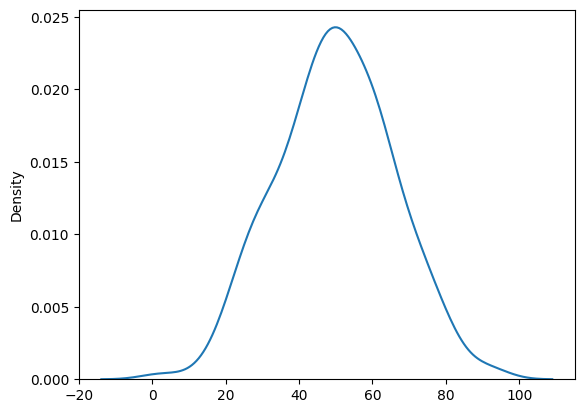

In [154]:
# kdeplot: 데이터의 확률 밀도 함수를 시각화하는 그래프
# 샘플 데이터 생성
data = np.random.normal(loc=50, scale=15, size=200)  # 평균 50, 표준편차 15인 데이터 200개

# KDE 플롯 그리기
sns.kdeplot(data)
plt.show()

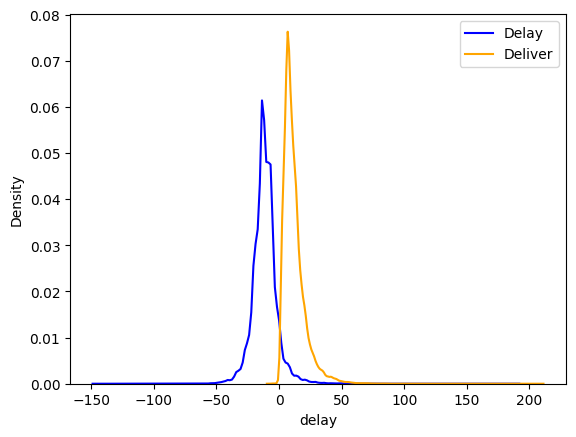

-11.342257290589558
12.03018431092027


In [155]:
# to_datetime으로 변환
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

# order_delivered_customer_date: 고객에게 실제 배송된 일자
# order_estimated_delivery_date: 구매 시점에 고객에게 안내된 예상 배송일
# order_approved_at: 결제 승인
# 60(1분=60초) * 60(1시간=60분) * 24(1일=24시간) (1일 = 86,400초)
df['delay'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.total_seconds() / (3600 * 24)
df['deliver'] = (df['order_delivered_customer_date'] - df['order_approved_at']).dt.total_seconds() / (3600 * 24)
 
# 라인차트 생성
sns.kdeplot(df['delay'], label='Delay', color='blue')
sns.kdeplot(df['deliver'], label='Deliver', color='orange')
plt.legend()
plt.show()

# 평균값 표시
print(df['delay'].mean())
print(df['deliver'].mean())

# 실제 상품이 deliver가 된 평균일자는 12일이고, 예상보다 지연된 평균일자는 -11일이다.
# 예상 배송일자보다 빠르게 배송되고 있지만, 실제 배송일은 12일로 비교적 배송일이 느리다.

## 4. 지역별 배송 지연 분석  

In [156]:
# groupby(): 특정 열을 기준으로 데이터를 그룹화하는 함수
# 데이터 생성
data = {
    "Name": ["Alice", "Bob", "Charlie", "David", "Emma", "Frank"],
    "Department": ["HR", "IT", "IT", "HR", "Sales", "Sales"],
    "Salary": [50000, 40000, 70000, 30000, 50000, 100000]
}

# DataFrame 생성
df_sample = pd.DataFrame(data)

# 출력
print(df_sample)

# groupby + sort_values()
df_grouped = df_sample.groupby("Department")["Salary"].mean()
print(df_grouped)

# ascending: 오름차순
df_sorted = df_grouped.sort_values(ascending=True).index
print(df_sorted)

      Name Department  Salary
0    Alice         HR   50000
1      Bob         IT   40000
2  Charlie         IT   70000
3    David         HR   30000
4     Emma      Sales   50000
5    Frank      Sales  100000
Department
HR       40000.0
IT       55000.0
Sales    75000.0
Name: Salary, dtype: float64
Index(['HR', 'IT', 'Sales'], dtype='object', name='Department')


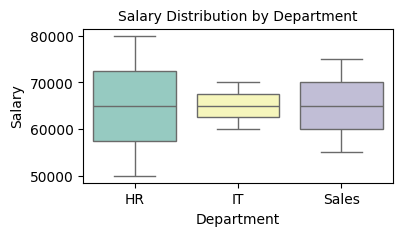

In [157]:
# boxplot: 데이터의 분포를 시각화하는 데 유용한 도구로, 중앙값, 사분위수, 이상치 등을 파악
# 예시 데이터
data = {
    'Department': ['HR', 'IT', 'IT', 'HR', 'Sales', 'Sales'],
    'Salary': [50000, 60000, 70000, 80000, 55000, 75000]
}

# DataFrame 생성
df_sample = pd.DataFrame(data)

# 박스플롯 생성
plt.figure(figsize=(4,2)) # 크기
sns.boxplot(x="Department", y="Salary", data=df_sample, palette="Set3")
plt.title('Salary Distribution by Department', fontsize=10)
plt.show()

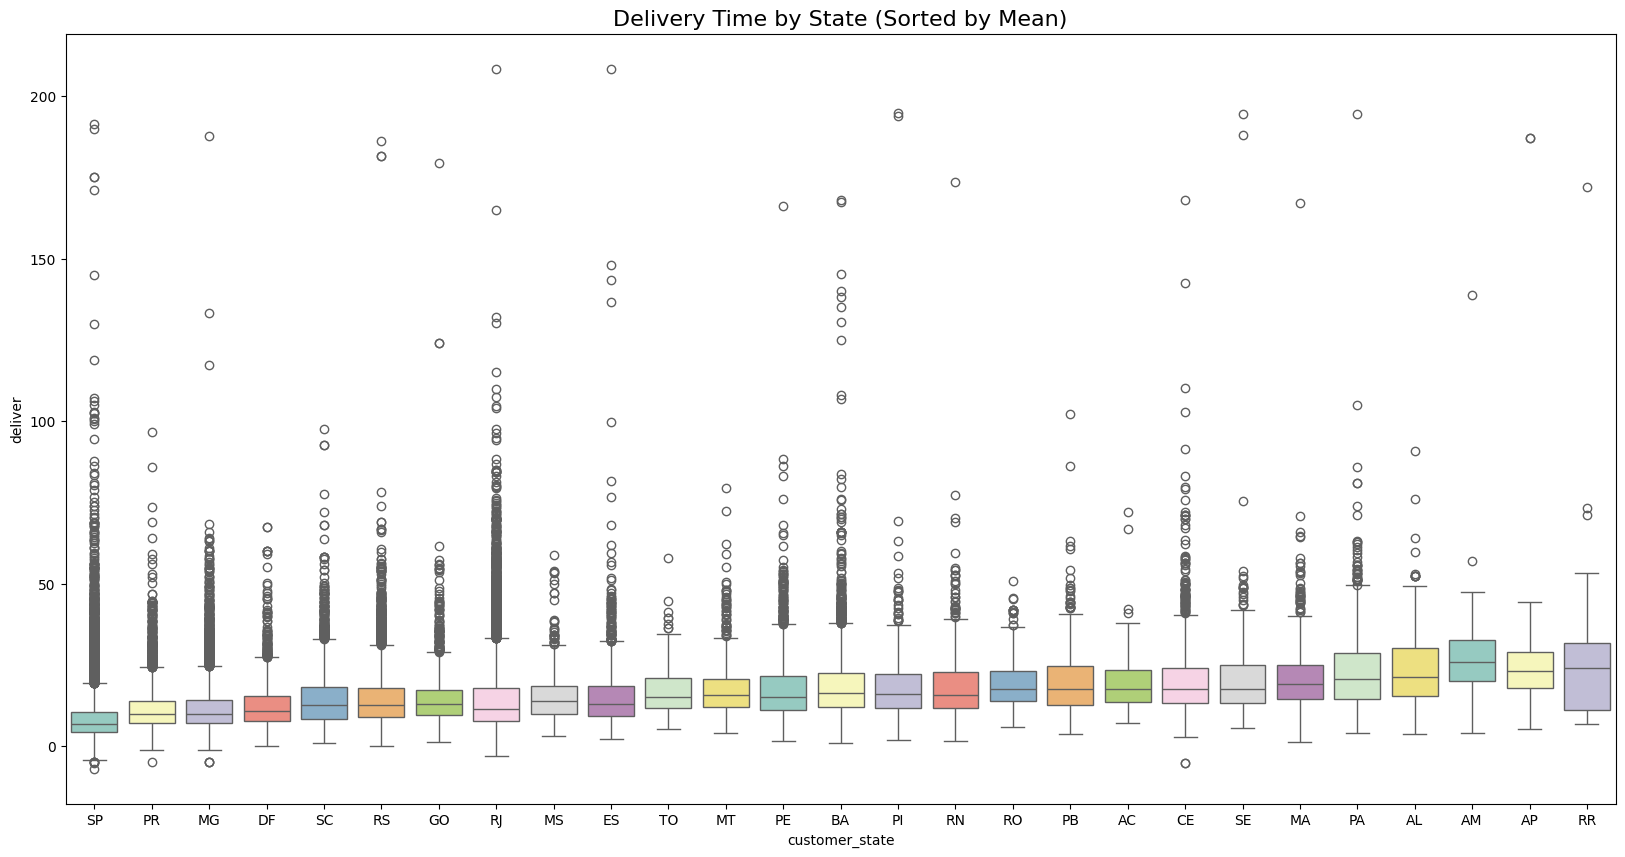

In [158]:
# customer_state별로 deliver의 평균값을 계산하고, 
# 그 평균값을 기준으로 오름차순으로 정렬한 후, customer_state 컬럼을 정렬된 순서대로 박스플롯 그리기.

# customer_state별 deliver 평균값 계산 후 정렬
sorted_states = df.groupby("customer_state")["deliver"].mean().sort_values(ascending=True).index

# customer_state 컬럼을 정렬된 순서로 설정
df["customer_state"] = pd.Categorical(df["customer_state"], categories=sorted_states, ordered=True)

# 박스플롯 그리기
fig = plt.figure(figsize=(20, 10)) # 크기
sns.boxplot(x="customer_state", y="deliver", data=df, palette="Set3")
plt.title("Delivery Time by State (Sorted by Mean)", fontsize=16)
plt.show()

In [159]:
# 딕셔너리(dictionary): 키(key)와 값(value)의 쌍으로 데이터를 저장하는 자료형
dictionary = {
    'A': (1, 'a'),
    'B': (2, 'b'),
    'C': (3, 'c'),
    'D': (4, 'd'),
    'E': (5, 'e'),
}
print(states_coords)

# 위도, 경도와 주 이름을 DataFrame으로 변환
data = pd.DataFrame(dictionary.items(), columns=["key", "value"])
data.head()

{'RR': (-1.4425, -62.0702), 'AM': (-3.4653, -62.2159), 'AC': (-8.7736, -70.0555), 'AP': (1.4117, -51.7719), 'PA': (-5.7945, -53.1416), 'RO': (-10.1615, -64.6017), 'CE': (-5.3983, -39.3206), 'MA': (-5.1106, -45.874), 'PB': (-7.1195, -35.2295), 'RN': (-5.7945, -35.211), 'PE': (-8.0476, -34.877), 'PI': (-7.1153, -42.2603), 'AL': (-9.571, -36.782), 'SE': (-10.9472, -37.0731), 'TO': (-12.6217, -49.2772)}


,key,value
0,A,"(1, a)"
1,B,"(2, b)"
2,C,"(3, c)"
3,D,"(4, d)"
4,E,"(5, e)"


In [160]:
# lambda: 함수형 프로그래밍에서 중요한 개념 중 하나로, 익명 함수
# apply: DataFrame 또는 Series에서 각 요소(행/열)에 함수를 적용하는 메서드
data['first'] = data['value'].apply(lambda x: x[0]) # 첫 번째 요소(x[0])
data['first']

0    1
1    2
2    3
3    4
4    5
Name: first, dtype: int64

In [161]:
# 타지역 대비 평균배송시간이 빠른 브라질 주들의 위도, 경도 좌표(SP, PR, MG, DF, SC, RS, GO, RJ, MS, ES)
states_coords = {
    'SP': (-23.5505, -46.6333),
    'PR': (-25.4296, -49.2733),
    'MG': (-19.9245, -43.9352),
    'DF': (-15.8267, -47.9218),
    'SC': (-27.5954, -48.5480),
    'RS': (-30.0346, -51.2177),
    'GO': (-16.6869, -49.2643),
    'RJ': (-22.9068, -43.1729),
    'MS': (-20.4697, -54.6200),
    'ES': (-19.3170, -40.3363)
}

# 위도, 경도와 주 이름을 DataFrame으로 변환
data = pd.DataFrame(states_coords.items(), columns=["State", "Coordinates"])
data['Lat'] = data['Coordinates'].apply(lambda x: x[0])
data['Lon'] = data['Coordinates'].apply(lambda x: x[1])

# Plotly 지도 생성
fig = px.scatter_geo(data, lat='Lat', lon='Lon', text='State', 
                     title='Brazil States with Points', 
                     projection="natural earth")
fig.show()

# 주요 대도시 남쪽 도시들의 배송 시간이 짧고 효율적이며,북쪽 도시는 비교적 배송 시간이 오래 걸린다.
# 지리적 특성이 배송에 악영향을 미치는 지역에 대해 추가적인 물류 허브 설립 또는 배송 프로세스 최적화 필요하다.

## 5. 고객 분포 분석(step2)

In [162]:
# 샘플 데이터 생성
df_sample = pd.DataFrame({
    'OldName1': [10, 20, 30],
    'OldName2': [40, 50, 60]
})

# rename: 열 이름 변경
df_sample_renamed = df_sample.rename(columns={'OldName1': 'NewName1', 'OldName2': 'NewName2'})

print(df_sample_renamed)

   NewName1  NewName2
0        10        40
1        20        50
2        30        60


In [163]:
# drop: 열 삭제
df_sample_renamed = df_sample_renamed.drop('NewName1', axis=1) # 행(axis=0) / 열(axis=1)
print(df_sample_renamed)

   NewName2
0        40
1        50
2        60


In [164]:
# state 위도 경도
geo_state_lat = df_geo.groupby('geolocation_state')['geolocation_lat'].mean().reset_index()
geo_state_lng = df_geo.groupby('geolocation_state')['geolocation_lng'].mean().reset_index()
geo_state_lat.rename(columns={'geolocation_lat': 'customer_state_lat'}, inplace=True)
geo_state_lng.rename(columns={'geolocation_lng': 'customer_state_lng'}, inplace=True)

# city 평균 위도 경도
geo_city_lat = df_geo.groupby('geolocation_city')['geolocation_lat'].mean().reset_index()
geo_city_lng = df_geo.groupby('geolocation_city')['geolocation_lng'].mean().reset_index()
geo_city_lat.rename(columns={'geolocation_lat': 'customer_city_lat'}, inplace=True)
geo_city_lng.rename(columns={'geolocation_lng':'customer_city_lng'}, inplace=True)

# 테이블 결합
df = pd.merge(df, geo_state_lat, how='left', left_on='customer_state',right_on='geolocation_state')
df = pd.merge(df, geo_state_lng, how='left', left_on='customer_state',right_on='geolocation_state')
df = pd.merge(df, geo_city_lat,  how='left', left_on='customer_city' ,right_on='geolocation_city')
df = pd.merge(df, geo_city_lng,  how='left', left_on='customer_city' ,right_on='geolocation_city')

# 불필요한 컬럼 제거
df = df.drop('geolocation_city_x', axis=1)
df = df.drop('geolocation_city_y', axis=1)
df = df.drop('geolocation_state_x', axis=1)
df = df.drop('geolocation_state_y', axis=1)

# 테이블 조회
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_state,seller_zip_code_prefix,seller_city,seller_state,delay,deliver,customer_state_lat,customer_state_lng,customer_city_lat,customer_city_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,SP,9350,maua,SP,-7.107488,8.429144,-23.155308,-47.084074,-23.570860,-46.633242
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,BA,31570,belo horizonte,SP,-5.355729,12.502292,-13.049361,-39.560649,-12.148291,-44.967260
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,GO,14840,guariba,SP,-17.245498,9.382708,-16.577645,-49.334195,-16.745552,-48.514168
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,RN,31842,belo horizonte,MG,-12.980069,13.196331,-5.856702,-35.990079,-4.864240,-36.839625
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,SP,8752,mogi das cruzes,SP,-9.238171,2.830938,-23.155308,-47.084074,-23.655241,-46.519084


In [165]:
# astype(str): 데이터 타입을 문자열(str)로 변환하는 메서드

In [166]:
# state 주문수 및 평균주문시간 
state_order = df.groupby(['customer_state','customer_state_lng','customer_state_lat'])['order_id'].count().to_frame().reset_index()
state_deliver = df.groupby(['customer_state','customer_state_lng','customer_state_lat'])['deliver'].mean().reset_index()
state_deliver['text'] = 'state :' + state_deliver['customer_state'] + ' | deliver: ' + state_deliver['deliver'].astype(str) + ' | order: ' + state_order['order_id'].astype(str)

# city 주문수 및 평균주문시간 
city_order = df.groupby(['customer_city','customer_city_lng','customer_city_lat'])['order_id'].count().to_frame().reset_index()
city_deliver = df.groupby(['customer_city','customer_city_lng','customer_city_lat'])['deliver'].mean().reset_index()
city_deliver['text'] = 'city :' + city_deliver['customer_city'] + ' | deliver: ' + city_deliver['deliver'].astype(str) + ' | order: ' + city_order['order_id'].astype(str)

# state 및 city 주문수 및 평균주문시간 지도 그리기
# 주문수(크기) / 평균주문시간(색 강조)
data = [
    go.Scattergeo(
    lon = state_order['customer_state_lng'], # 'customer_state_lng' 열에 저장된 경도 값 사용
    lat = state_order['customer_state_lat'], # 'customer_state_lat' 열에 저장된 위도 값 사용
    text = state_deliver['text'], # 'text' 열의 텍스트를 각 포인트에 표시
    marker = dict(
        size = state_order['order_id'] / 50, # 'order_id'를 50으로 나눈 값을 마커의 크기로 사용
        sizemin = 1, # 마커의 최소 크기 설정
        color= state_deliver['deliver'], # 'deliver' 열의 값을 마커 색상으로 사용
        colorscale= 'Greens', # 색상 스케일을 'Greens'로 설정
        cmin = state_deliver['deliver'].min(), # 색상의 최소값을 'deliver'의 최소값으로 설정
        cmax = state_deliver['deliver'].mean(), # 색상의 최대값을 'deliver'의 평균값으로 설정
        line = dict(width=0.1, color='rgb(40,40,40)'), # 마커 테두리 설정: 색상은 회색, 두께는 0.1
        sizemode = 'area' # 마커 크기 모드 설정: 크기는 면적에 비례
        ),
    name = 'State'
    ),
    go.Scattergeo(
        lon = city_order['customer_city_lng'],
        lat = city_order['customer_city_lat'],
        text = city_deliver['text'],
        marker = dict(
            size = city_order['order_id'] / 50,
            sizemin = 1,
            color = city_deliver['deliver'],
            colorscale = 'Reds',
            cmin = city_deliver['deliver'].min(),
            cmax = city_deliver['deliver'].mean(),
            line = dict(width=0.1, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = 'City'    
    )
]

layout = dict(
    title = 'Brazilian E-commerce Order and deliver Values',  # 제목을 설정: 지도에 표시될 제목
    showlegend = True,  # 범례(legend) 표시 여부 설정
    autosize=True,  # 자동 크기 조정 활성화
    # 그래프의 너비와 높이 설정
    width = 900,  
    height = 600,  
    
    geo = dict(
        scope = "south america",  # 지도 범위 설정: 남미 대륙을 기준으로 표시
        projection = dict(type='winkel tripel', scale = 1.6), # 지도 투영 방법 설정: 'winkel tripel' 투영 방식 사용, 비율은 1.6으로 설정
        center = dict(lon=-47, lat=-22),  # 지도 중심을 설정: 중심을 위도 -22, 경도 -47로 설정
        showland = True,  # 지도에서 육지의 표시 여부
        showcountries = True,  # 국가의 표시 여부
        showsubunits = True,  # 국가의 하위 단위 표시 여부
        landcolor = 'rgb(155, 155, 155)',  # 육지의 색상 설정
        subunitwidth = 1,  # 국가 하위 단위(예: 주) 경계 두께 설정
        countrywidth = 1,  # 국가 경계 두께 설정
        subunitcolor="rgb(255, 255, 255)",  # 하위 단위 경계 색상 설정
        countrycolor="rgb(255, 255, 255)"  # 국가 경계 색상 설정
    )
)
fig = dict( data=data, layout=layout )
pio.show(fig)

# 대도시 고객 및 주문수 많으며, 배송시간도 짧다.

## 6. 판매자 분포 분석

In [167]:
# state 위도 경도
geo_state_lat = df_geo.groupby('geolocation_state')['geolocation_lat'].mean().reset_index()
geo_state_lng = df_geo.groupby('geolocation_state')['geolocation_lng'].mean().reset_index()
geo_state_lat.rename(columns={'geolocation_lat': 'seller_state_lat'}, inplace=True)
geo_state_lng.rename(columns={'geolocation_lng': 'seller_state_lng'}, inplace=True)

# city 평균 위도 경도
geo_city_lat = df_geo.groupby('geolocation_city')['geolocation_lat'].mean().reset_index()
geo_city_lng = df_geo.groupby('geolocation_city')['geolocation_lng'].mean().reset_index()
geo_city_lat.rename(columns={'geolocation_lat': 'seller_city_lat'}, inplace=True)
geo_city_lng.rename(columns={'geolocation_lng':'seller_city_lng'}, inplace=True)

# 테이블 결합
df = pd.merge(df, geo_state_lat, how='left', left_on='seller_state',right_on='geolocation_state')
df = pd.merge(df, geo_state_lng, how='left', left_on='seller_state',right_on='geolocation_state')
df = pd.merge(df, geo_city_lat,  how='left', left_on='seller_city' ,right_on='geolocation_city')
df = pd.merge(df, geo_city_lng,  how='left', left_on='seller_city' ,right_on='geolocation_city')

# 불필요한 컬럼 제거
df = df.drop('geolocation_city_x', axis=1)
df = df.drop('geolocation_city_y', axis=1)
df = df.drop('geolocation_state_x', axis=1)
df = df.drop('geolocation_state_y', axis=1)

# 테이블 조회
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,delay,deliver,customer_state_lat,customer_state_lng,customer_city_lat,customer_city_lng,seller_state_lat,seller_state_lng,seller_city_lat,seller_city_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,-7.107488,8.429144,-23.155308,-47.084074,-23.570860,-46.633242,-23.155308,-47.084074,-23.669994,-46.448909
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,-5.355729,12.502292,-13.049361,-39.560649,-12.148291,-44.967260,-23.155308,-47.084074,-19.908772,-43.957549
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,-17.245498,9.382708,-16.577645,-49.334195,-16.745552,-48.514168,-23.155308,-47.084074,-21.363502,-48.229601
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,-12.980069,13.196331,-5.856702,-35.990079,-4.864240,-36.839625,-19.864647,-44.421615,-19.908772,-43.957549
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,-9.238171,2.830938,-23.155308,-47.084074,-23.655241,-46.519084,-23.155308,-47.084074,-23.530402,-46.193888


In [168]:
# state 주문수 및 평균주문시간 
state_order = df.groupby(['seller_state','seller_state_lng','seller_state_lat'])['order_id'].count().to_frame().reset_index()
state_deliver = df.groupby(['seller_state','seller_state_lng','seller_state_lat'])['deliver'].mean().reset_index()
state_deliver['text'] = 'state :' + state_deliver['seller_state'] + ' | deliver: ' + state_deliver['deliver'].astype(str) + ' | order: ' + state_order['order_id'].astype(str)

# city 주문수 및 평균주문시간 
city_order = df.groupby(['seller_city','seller_city_lng','seller_city_lat'])['order_id'].count().to_frame().reset_index()
city_deliver = df.groupby(['seller_city','seller_city_lng','seller_city_lat'])['deliver'].mean().reset_index()
city_deliver['text'] = 'city :' + city_deliver['seller_city'] + ' | deliver: ' + city_deliver['deliver'].astype(str) + ' | order: ' + city_order['order_id'].astype(str)

# state 및 city 주문수 및 평균주문시간 지도 그리기
# 주문수(크기) / 평균주문시간(색 강조)
data = [
    go.Scattergeo(
    lon = state_order['seller_state_lng'],
    lat = state_order['seller_state_lat'],
    text = state_deliver['text'],
    marker = dict(
        size = state_order['order_id']/50,
        sizemin = 1,
        color= state_deliver['deliver'],
        colorscale= 'Oranges',
        cmin = state_deliver['deliver'].min(),
        cmax = state_deliver['deliver'].mean(),
        line = dict(width=0.1, color='rgb(40,40,40)'),
        sizemode = 'area'
        ),
    name = 'State'
    ),
    go.Scattergeo(
        lon = city_order['seller_city_lng'],
        lat = city_order['seller_city_lat'],
        text = city_deliver['text'],
        marker = dict(
            size = city_order['order_id'] / 50,
            sizemin = 1,
            color = city_deliver['deliver'],
            colorscale = 'Blues',
            cmin = city_deliver['deliver'].min(),
            cmax = city_deliver['deliver'].mean(),
            line = dict(width=0.1, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = 'City'    
    )
]

layout = dict(
        title = 'Brazilian E-commerce Order and deliver Values',
        showlegend = True,
        autosize=True,
        width = 900,
        height = 600,
        geo = dict(
            scope = "south america",
            projection = dict(type='winkel tripel', scale = 1.6),
            center = dict(lon=-47,lat=-22),
            showland = True,
            showcountries= True,
            showsubunits=True,
            landcolor = 'rgb(155, 155, 155)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        )
    )
fig = dict( data=data, layout=layout )
pio.show(fig)

# 대도시 판매자 수가 압도적으로 많이 분포한디.

## 7. 고객 및 판매자 분포 분석

In [169]:
# city 고객 주문수 및 평균주문시간 
customer_city_order = df.groupby(['customer_city','customer_city_lng','customer_city_lat'])['order_id'].count().to_frame().reset_index()
customer_city_deliver = df.groupby(['customer_city','customer_city_lng','customer_city_lat'])['deliver'].mean().reset_index()
customer_city_deliver['text'] = 'city :' + customer_city_deliver['customer_city'] + ' | deliver: ' + customer_city_deliver['deliver'].astype(str) + ' | order: ' + customer_city_order['order_id'].astype(str)

# city 판매자 주문수 및 평균주문시간 
seller_city_order = df.groupby(['seller_city','seller_city_lng','seller_city_lat'])['order_id'].count().to_frame().reset_index()
seller_city_deliver = df.groupby(['seller_city','seller_city_lng','seller_city_lat'])['deliver'].mean().reset_index()
seller_city_deliver['text'] = 'city :' + seller_city_deliver['seller_city'] + ' | deliver: ' + seller_city_deliver['deliver'].astype(str) + ' | order: ' + seller_city_order['order_id'].astype(str)

# 고객 및 판매자별 주문수 및 평균주문시간 지도 그리기
# 주문수(크기) / 평균주문시간(색 강조)
data = [
    go.Scattergeo(
    lon = customer_city_order['customer_city_lng'],
    lat = customer_city_order['customer_city_lat'],
    text = customer_city_deliver['text'],
    marker = dict(
        size = customer_city_order['order_id']/50,
        sizemin = 1,
        color= customer_city_deliver['deliver'],
        colorscale= 'Greens',
        cmin = customer_city_deliver['deliver'].min(),
        cmax = customer_city_deliver['deliver'].mean(),
        line = dict(width=0.1, color='rgb(40,40,40)'),
        sizemode = 'area'
        ),
    name = 'customer'
    ),
    go.Scattergeo(
        lon = seller_city_order['seller_city_lng'],
        lat = seller_city_order['seller_city_lat'],
        text = seller_city_deliver['text'],
        marker = dict(
            size = seller_city_order['order_id'] / 50,
            sizemin = 1,
            color = seller_city_deliver['deliver'],
            colorscale = 'Reds',
            cmin = seller_city_deliver['deliver'].min(),
            cmax = seller_city_deliver['deliver'].mean(),
            line = dict(width=0.1, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = 'seller'    
    )
]

layout = dict(
        title = 'Brazilian E-commerce Order and deliver Values',
        showlegend = True,
        autosize=True,
        width = 900,
        height = 600,
        geo = dict(
            scope = "south america",
            projection = dict(type='winkel tripel', scale = 1.6),
            center = dict(lon=-47,lat=-22),
            showland = True,
            showcountries= True,
            showsubunits=True,
            landcolor = 'rgb(155, 155, 155)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        )
    )
fig = dict( data=data, layout=layout )
pio.show(fig)

# 배송 프로세스 최적화를 위해, 물류 허브 설립 필요하다.

## 8. 판매자 및 고객 위도 경도 두 지점 간의 최단 거리 구하기(Step3)

In [170]:
# 판매자 위도 경도 컬럼 생성
# 주소 위도 경도
geo_zip_code_lat = df_geo.groupby('geolocation_zip_code_prefix')['geolocation_lat'].mean().reset_index()
geo_zip_code_lng = df_geo.groupby('geolocation_zip_code_prefix')['geolocation_lng'].mean().reset_index()
geo_zip_code_lat.rename(columns={'geolocation_lat': 'seller_zip_code_lat'}, inplace=True)
geo_zip_code_lng.rename(columns={'geolocation_lng': 'seller_zip_code_lng'}, inplace=True)

# 테이블 결합
df = pd.merge(df, geo_zip_code_lat, how='left', left_on='seller_zip_code_prefix',right_on='geolocation_zip_code_prefix')
df = pd.merge(df, geo_zip_code_lng, how='left', left_on='seller_zip_code_prefix',right_on='geolocation_zip_code_prefix')

# 불필요한 컬럼 삭제
df = df.drop('geolocation_zip_code_prefix_x', axis=1)
df = df.drop('geolocation_zip_code_prefix_y', axis=1)

# 고객 위도 경도 컬럼 생성
# 판매자 위도 경도 -> 고객 위도 경도 컬럼 변경
geo_zip_code_lat.rename(columns={'seller_zip_code_lat': 'customer_zip_code_lat'}, inplace=True)
geo_zip_code_lng.rename(columns={'seller_zip_code_lng': 'customer_zip_code_lng'}, inplace=True)

# 테이블 결합
df = pd.merge(df, geo_zip_code_lat, how='left', left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix')
df = pd.merge(df, geo_zip_code_lng, how='left', left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix')

# 불필요한 컬럼 삭제
df = df.drop('geolocation_zip_code_prefix_x', axis=1)
df = df.drop('geolocation_zip_code_prefix_y', axis=1)

df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_city_lat,customer_city_lng,seller_state_lat,seller_state_lng,seller_city_lat,seller_city_lng,seller_zip_code_lat,seller_zip_code_lng,customer_zip_code_lat,customer_zip_code_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,-23.570860,-46.633242,-23.155308,-47.084074,-23.669994,-46.448909,-23.680729,-46.444238,-23.576983,-46.587161
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,-12.148291,-44.967260,-23.155308,-47.084074,-19.908772,-43.957549,-19.807681,-43.980427,-12.177924,-44.660711
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,-16.745552,-48.514168,-23.155308,-47.084074,-21.363502,-48.229601,-21.363502,-48.229601,-16.745150,-48.514783
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,-4.864240,-36.839625,-19.864647,-44.421615,-19.908772,-43.957549,-19.837682,-43.924053,-5.774190,-35.271143
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,-23.655241,-46.519084,-23.155308,-47.084074,-23.530402,-46.193888,-23.543395,-46.262086,-23.676370,-46.514627


In [171]:
# def: Python에서 함수를 정의할 때 사용하는 키워드
# haversine: 구면 좌표계에서 두 지점 간 최단 거리(대원 거리, Great-circle distance)**를 계산하는 방법
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0 # 지구 반지름 (단위: km)
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

# 서울과 부산의 위도 및 경도
seoul_lat, seoul_lon = 37.5665, 126.9780
busan_lat, busan_lon = 35.1796, 129.0756    

# 거리 계산
distance = haversine(seoul_lat, seoul_lon, busan_lat, busan_lon)
print(f"서울과 부산 사이의 최단 거리: {distance:.2f} km")
# 고속도로로 운행할 경우 정확한 거리는 431.5km입니다. 비행기로 가는 경우 약 399km, 지도상에서 직선 거리는 314km입니다. 

서울과 부산 사이의 최단 거리: 325.11 km


In [172]:
# np.arange: 연속된 숫자가 포함된 배열(array)을 생성하는 함수
# np.arange(start, stop, step, dtype)
# start (선택) → 시작 값 (기본값: 0)
# stop → 끝 값(포함되지 않음!)
# step (선택) → 증가 간격 (기본값: 1)
# dtype (선택) → 데이터 타입 지정
arr = np.arange(1, 10, 2, dtype=float)
print(arr)

[1. 3. 5. 7. 9.]


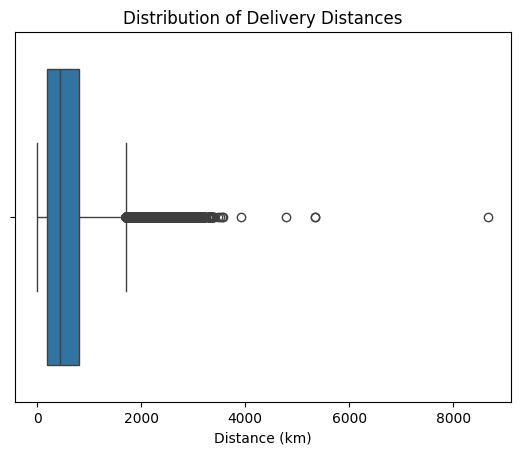

중앙값: 432.0 km
가장 많은 주문이 포함된 구간: (0.0, 100.0], 해당 구간에 주문수는 20595 이다.


In [173]:
# 두 지점간의 최단거리 구하기, 하버사인 공식(Haversine Formula)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

# 최단거리 컬럼 생성
df['distance_km'] = haversine(df['seller_zip_code_lat'], df['seller_zip_code_lng'], df['customer_zip_code_lat'], df['customer_zip_code_lng'])

# 박스플롯 생성
sns.boxplot(data=df, x='distance_km')
plt.title('Distribution of Delivery Distances')
plt.xlabel('Distance (km)')
plt.show()

# 중앙값
median_distance = round(df['distance_km'].median(), 0)
print(f"중앙값: {median_distance} km")

# 배송거리 100km 구간별로 나눠, 가장 주문 수가 많은 구간과 해당 구간의 주문 수 계산
df['distance_bin'] = pd.cut(df['distance_km'], bins=np.arange(0, df['distance_km'].max() + 100, 100))
# df['distance_km'].max() + 100: + 100을 하는 이유는 최대 거리 값도 마지막 구간에 포함되도록 하기 위해서

bin_counts = df['distance_bin'].value_counts().sort_index()
most_common_bin = bin_counts.idxmax()
# idxmax: 최댓값을 가지는 인덱스를 반환하는 함수
most_common_count = bin_counts.max()
# max: 최댓값을 반환하는 함수
print(f"가장 많은 주문이 포함된 구간: {most_common_bin}, 해당 구간에 주문수는 {most_common_count} 이다.")

## 9. 지역별 배송거리 분석

In [174]:
# len: 객체(리스트, 문자열, 튜플, 딕셔너리 등)의 길이(개수)를 반환하는 함수
text = "Python"
print(len(text))  

numbers = [10, 20, 30, 40, 50]
print(len(numbers))

6
5


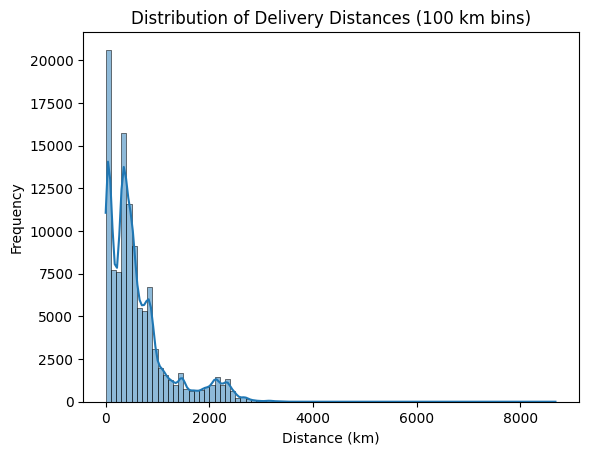

100km 이상 구간의 주문 비중: 80.93%


In [175]:
# 배송거리 100km 구간
bins = np.arange(0, df['distance_km'].max() + 100, 100)

# 배송거리 100km 구간별 주문수
sns.histplot(df['distance_km'], bins=bins, kde=True)
plt.title('Distribution of Delivery Distances (100 km bins)')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()

# 100km 이상인 주문 수의 비중
count_over_100km = (df['distance_km'] >= 100).sum()
total_count = len(df)
percentage_over_100km = (count_over_100km / total_count) * 100
print(f"100km 이상 구간의 주문 비중: {percentage_over_100km:.2f}%")
# 2f: 소수점 이하 두 자리까지 표시하는 실수 서식

In [176]:
# for: 반복문
for i in range(2):
    for j in range(2):
        print(f"i={i}, j={j}")

i=0, j=0
i=0, j=1
i=1, j=0
i=1, j=1


In [177]:
# enumerate: 반복 가능한 객체(리스트, 튜플 등)의 인덱스와 값을 함께 반환하는 함수
fruits = ["apple", "banana", "cherry"]
for index, fruit in enumerate(fruits):
    print(f"Index: {index}, Fruit: {fruit}")

Index: 0, Fruit: apple
Index: 1, Fruit: banana
Index: 2, Fruit: cherry


In [178]:
# sorted: 딕셔너리의 값을 기준으로 정렬
state_means_sample = {
    'SP': 10,  # São Paulo
    'PR': 20,  # Paraná
    'MG': 15,  # Minas Gerais
    'DF': 25   # Distrito Federal
}
sorted_sample = sorted(state_means_sample, key=state_means_sample.get, reverse=True)
print(sorted_sample)  # [1, 1, 3, 4, 5, 9]

['DF', 'PR', 'MG', 'SP']


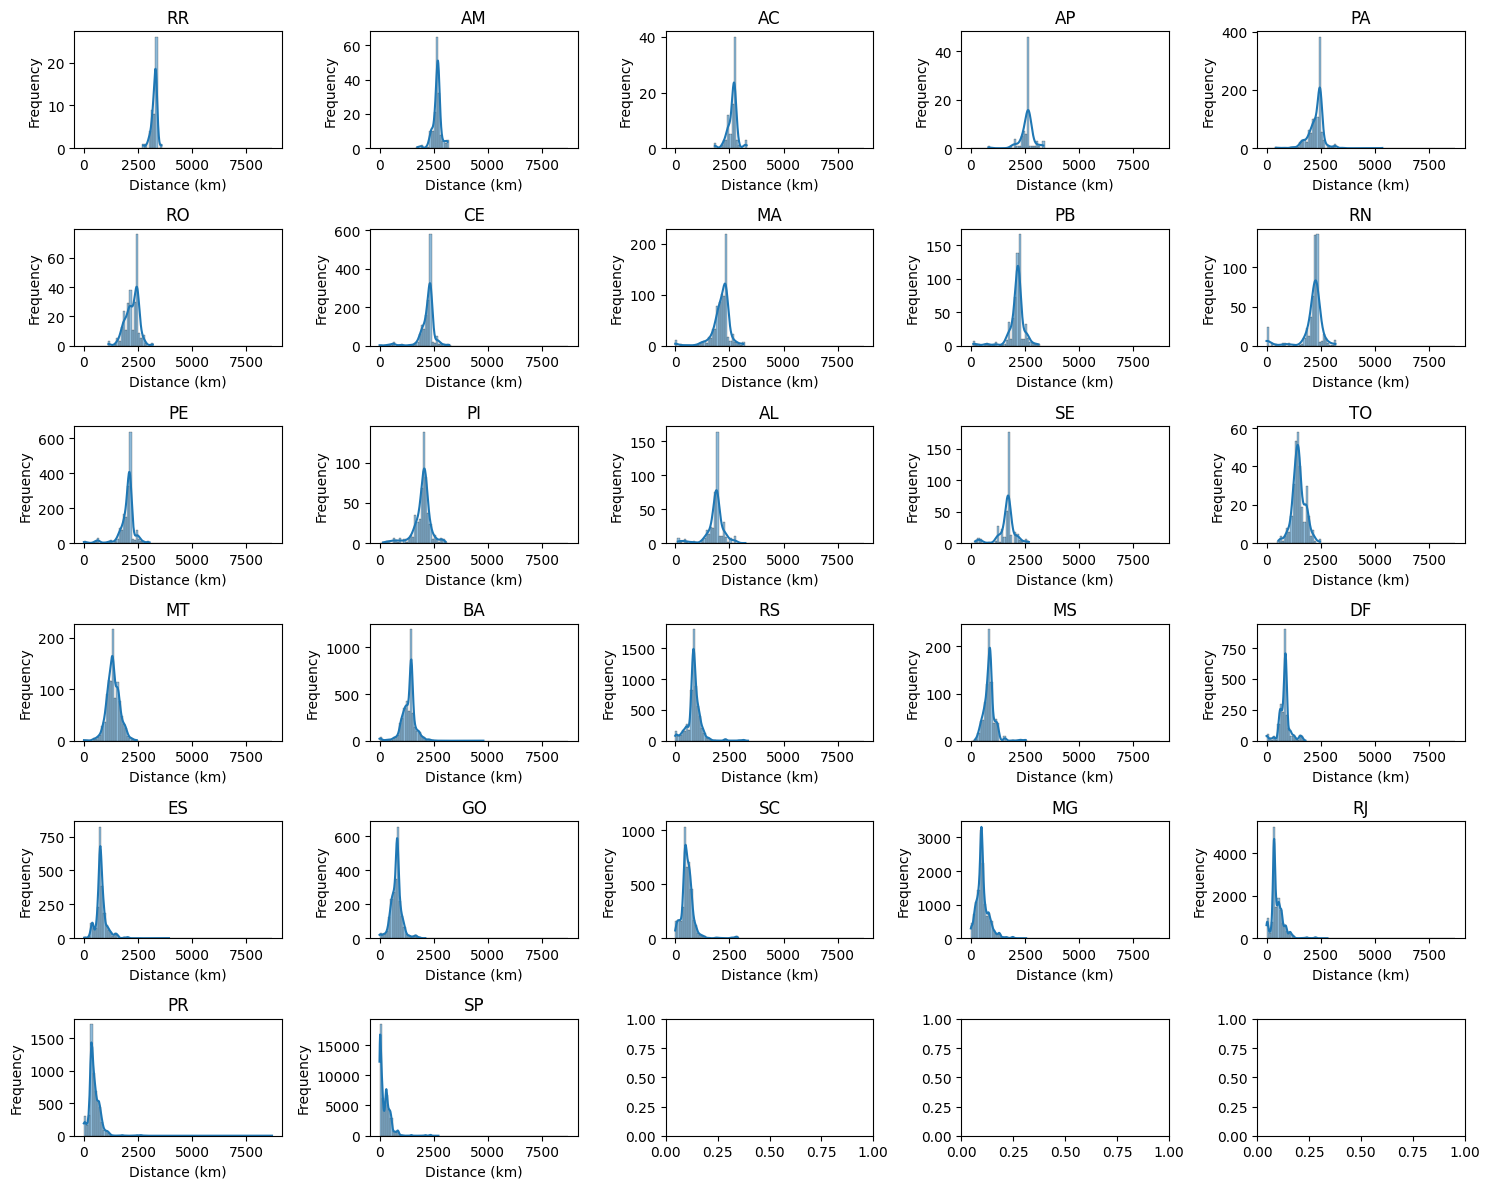

In [179]:
# 고유한 customer_state 값 가져오기
states = df['customer_state'].unique()

# 각 state별 평균 distance_km 계산
state_means = {state: df[df['customer_state'] == state]['distance_km'].mean() for state in states}

# 평균값을 기준으로 states 정렬 (내림차순: reverse=True)
sorted_states = sorted(state_means, key=state_means.get, reverse=True)

# 6x5 그리드 설정
n_rows = 6
n_cols = 5
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))

# 각 state별로 히스토그램 그리기
for i, state in enumerate(sorted_states):
    row = i // n_cols  # 행 위치
    col = i % n_cols   # 열 위치

    # 특정 state의 데이터 필터링
    state_data = df[df['customer_state'] == state]
    
    # 각 서브플롯에 히스토그램 그리기
    sns.histplot(state_data['distance_km'], bins=bins, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'{state}')
    axes[row, col].set_xlabel('Distance (km)')
    axes[row, col].set_ylabel('Frequency')

# 레이아웃 조정
plt.tight_layout()
plt.show()

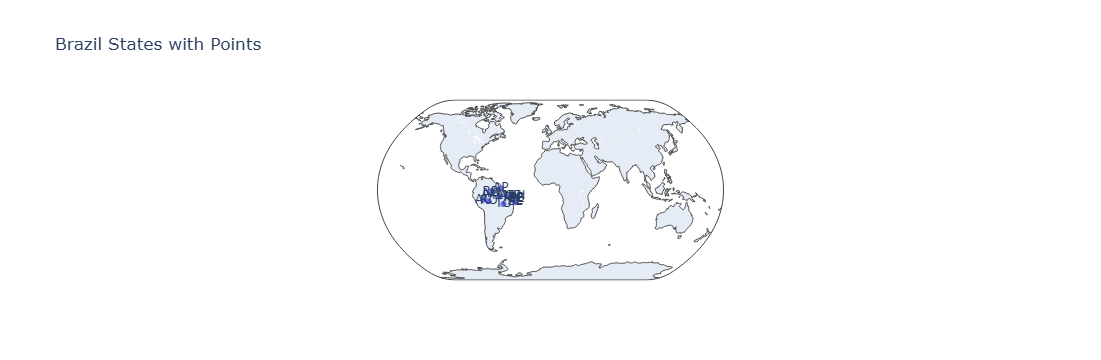

In [180]:
# 브라질 주들의 위도, 경도 좌표(RR, AM, AC, AP, PA, RO, CE, MA, PB, RN, PE, PI, AL, SE, TO)
states_coords = {
    'RR': (-1.4425, -62.0702),
    'AM': (-3.4653, -62.2159),
    'AC': (-8.7736, -70.0555),
    'AP': (1.4117, -51.7719),
    'PA': (-5.7945, -53.1416),
    'RO': (-10.1615, -64.6017),
    'CE': (-5.3983, -39.3206),
    'MA': (-5.1106, -45.8740),
    'PB': (-7.1195, -35.2295),
    'RN': (-5.7945, -35.2110),
    'PE': (-8.0476, -34.8770),
    'PI': (-7.1153, -42.2603),
    'AL': (-9.5710, -36.7820),
    'SE': (-10.9472, -37.0731),
    'TO': (-12.6217, -49.2772)
}

# 위도, 경도와 주 이름을 DataFrame으로 변환
data = pd.DataFrame(states_coords.items(), columns=["State", "Coordinates"])
data['Lat'] = data['Coordinates'].apply(lambda x: x[0])
data['Lon'] = data['Coordinates'].apply(lambda x: x[1])

# Plotly 지도 생성
fig = px.scatter_geo(data, lat='Lat', lon='Lon', text='State', 
                     title='Brazil States with Points', 
                     projection="natural earth")
fig.show()